# Reference-based integration using Palette

Given an integrated reference and an unintegrated query, **Palette** leverages shared modalities as bridges to align them into a common latent space, thereby enabling accurate knowledge transfer and consistent downstream analysis across datasets. 

In this tutorial, we employed 12 batches of the human bone marrow mononuclear cells (BMMCs) data from the [NeurIPS 2021 single-cell multimodal data benchmark](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE194122), containing both six CITE-seq and six 10x Multiome batches. For each technology, we use the first three batches as the reference, and the last three batches as the query. The supervised integration of the **Palette** was applied, constructing a comprehensive reference.

In [1]:
library(PaletteSC)
library(uwot)
library(cowplot)
library(RColorBrewer)
library(ggplot2)
library(RColorBrewer)
library(scattermore)
library(ggsci)
library(data.table)

Loading required package: Matrix



In the reference-based integration task, the required input data include: the expression matrix that bridges the **(1)** reference dataset and the **(2)** query dataset, and **(3)** the integrated low-dimensional embedding of the reference dataset

## Load reference data matrices and Palette integrated embeddings

In [2]:
ref_emb <- t(as.matrix(fread('./Palette_res_supervised.csv',
                                 data.table = F)))
ref_meta <- readRDS('../meta.rds')
colnames(ref_emb) <- rownames(ref_meta)

In [3]:
setwd('../')
path1 <- c('./CITE/s1d1_cite','./CITE/s1d2_cite','./CITE/s1d3_cite',
           './Multiome/s1d1_multi','./Multiome/s1d2_multi','./Multiome/s1d3_multi')
rna.list <- list()
adt.list <- list()
atac.list <- list()

for(i in 1:6){
    rna.list[[i]] <- readRDS(paste0(path1[i],'/rna.rds'))
    if(i %in% c(1,2,3)){
      adt.list[[i]] <-  readRDS(paste0(path1[i],'/adt.rds'))
    }
    if(i %in% c(4,5,6)){
        atac.list[[i-3]] <-  readRDS(paste0(path1[i],'/atac.rds'))
    }
}

ref <- c(rna.list,adt.list,atac.list)

## Load query data matrices

In [4]:
setwd('../')
path1 <- c('./CITE/s2d1_cite','./CITE/s2d4_cite','./CITE/s2d5_cite',
           './Multiome/s2d1_multi','./Multiome/s2d4_multi','./Multiome/s2d5_multi')

rna.list <- list()
adt.list <- list()
atac.list <- list()
meta_q.list <- list()
for(i in 1:6){
    rna.list[[i]] <- readRDS(paste0(path1[i],'/rna.rds'))
    if(i %in% c(1,2,3)){
      adt.list[[i]] <-  readRDS(paste0(path1[i],'/adt.rds'))
    }
    if(i %in% c(4,5,6)){
        atac.list[[i-3]] <-  readRDS(paste0(path1[i],'/atac.rds'))
    }
    meta_q.list[[i]] <- readRDS(paste0(path1[i],'/meta.rds'))
    meta_q.list[[i]]$batch <- paste0(meta_q.list[[i]]$batch,'-',meta_q.list[[i]]$modality)
}
q <- c(rna.list,adt.list,atac.list)
rm(rna.list,adt.list,atac.list)

## Construct low-dimensional representations of the query based on the integrated embedding of the reference

For each query batch, we identify reference batches whose modality composition either exactly matches or is a strict subset of that in the query batch. Each shared modality is then independently harmonized using established integration tools (**FastMNN** by default in **Palette**). Then we infers the approximate query embedding on the **Palette** integrated reference sapce.

```reference``` and ```query``` accept data of reference and query in **list format**, with each element representing a feature-by-cell data matrix. The modality and batch information for each input are provided through ```modal_ref```, ```modal_query```, ```batch_ref```, and ```batch_query```. ```normalize_method``` is used to specify the normalization method corresponding to the modality in ```modal_order```. ```latent``` accepts the integrated low-dimensional embedding of the reference dataset (row as features and column as cells).

In [5]:
res <- RQ.Rep(reference = ref,query = q,
              modal_ref = c(rep('rna',6),rep('adt',3),rep('atac',3)),
              modal_query = c(rep('rna',6),rep('adt',3),rep('atac',3)),
              batch_ref = c('s1d1_cite','s1d2_cite','s1d3_cite',
                            's1d1_multi','s1d2_multi','s1d3_multi',
                            's1d1_cite','s1d2_cite','s1d3_cite',
                            's1d1_multi','s1d2_multi','s1d3_multi'),
              batch_query = c('s2d1_cite','s2d4_cite','s2d5_cite',
                            's2d1_multi','s2d4_multi','s2d5_multi',
                            's2d1_cite','s2d4_cite','s2d5_cite',
                            's2d1_multi','s2d4_multi','s2d5_multi'),
                  modal_order = c('rna','adt','atac'),
                  normalize_method = c('LogNormalize','CLR','TF-IDF'),
                  latent = ref_emb)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“u

Time difference of 31.53456 secs


Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames =

Time difference of 20.95758 secs


Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = N

Time difference of 29.57839 secs


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

Warning message:
“No assay specified, setting assay as RNA by default.”
Warning message in check_numbers(k = k, nu = nu, nv = nv, limit = min(dim(x)) - :
“more singular values/vectors requested than available”
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or u

Time difference of 29.2326 secs


Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



## Alignment of query and reference datasets

Finally, the low-dimensional representation of query data is aligned with the integrated embedding of the reference using established integration tools (FastMNN by default in Palette).

In [6]:
res_align  <- run_fastMNN(list(res[[1]],
                                   res[[2]],
                                   ref_emb),
                      cell_name = c(colnames(res[[1]]),
                                    colnames(res[[2]]),
                                    colnames(ref_emb)),
                      is.normalize = FALSE)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.4788”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.0286”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.24668”
W

Time difference of 11.36998 secs


In [7]:
rm(ref,q)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9128513,487.6,15331654,818.8,15331654,818.8
Vcells,20064585,153.1,7520712446,57378.5,9051081466,69054.3


## knowledge transfer

Using reference-based integration results of Palette, we can transfer knowledge from the reference to the query. Here, we use the cell type annotations of the reference dataset to predict the cell type annotations of the query dataset.

In [8]:
ref_meta <- ref_meta[,c(1,2,5,6)]
colnames(ref_meta) <- c('Barcode','Batch','CellType','Modality')
ref_meta$Dataset <- 'reference'
query_meta <- Reduce(rbind,meta_q.list)
query_meta <- query_meta[,c(1,2,5,6)]
colnames(query_meta) <- c('Barcode','Batch','CellType','Modality')
query_meta$Dataset <- 'query'
meta <- rbind(query_meta,ref_meta)

```Trans.Knowledge``` function transfers labels from reference to query using k-NN method. ```ref``` and ```query``` accept reference and query embeddings (row as cells and column as features) in a **matrix or a data.frame format**, respectively. ```ref.label``` accepts a data frame or vector of labels corresponding to the reference cells. ```k``` is the number of nearest neighbors to use in the k-NN classifier.

In [9]:
pred_label <- Trans.Knowledge(ref = t(res_align[,rownames(ref_meta)]),
                              query = t(res_align[,rownames(query_meta)]),
                              ref.label = data.frame(meta[rownames(ref_meta),3]),
                              k = 5)

In [10]:
meta$PredictLabel <- c(pred_label[,1],ref_meta[,3])
meta <- meta[c(rownames(ref_meta),rownames(query_meta)),]

## Visualization

In [11]:
res_align <- res_align[,rownames(meta)]

In [12]:
Palette_emb <- t(as.matrix(res_align))
Palette_umap = as.data.frame(umap(Palette_emb))
colnames(Palette_umap) = c("UMAP1", "UMAP2")
Palette_umap = cbind.data.frame(meta, Palette_umap)
fig.size = function(height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 300)
}

Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”


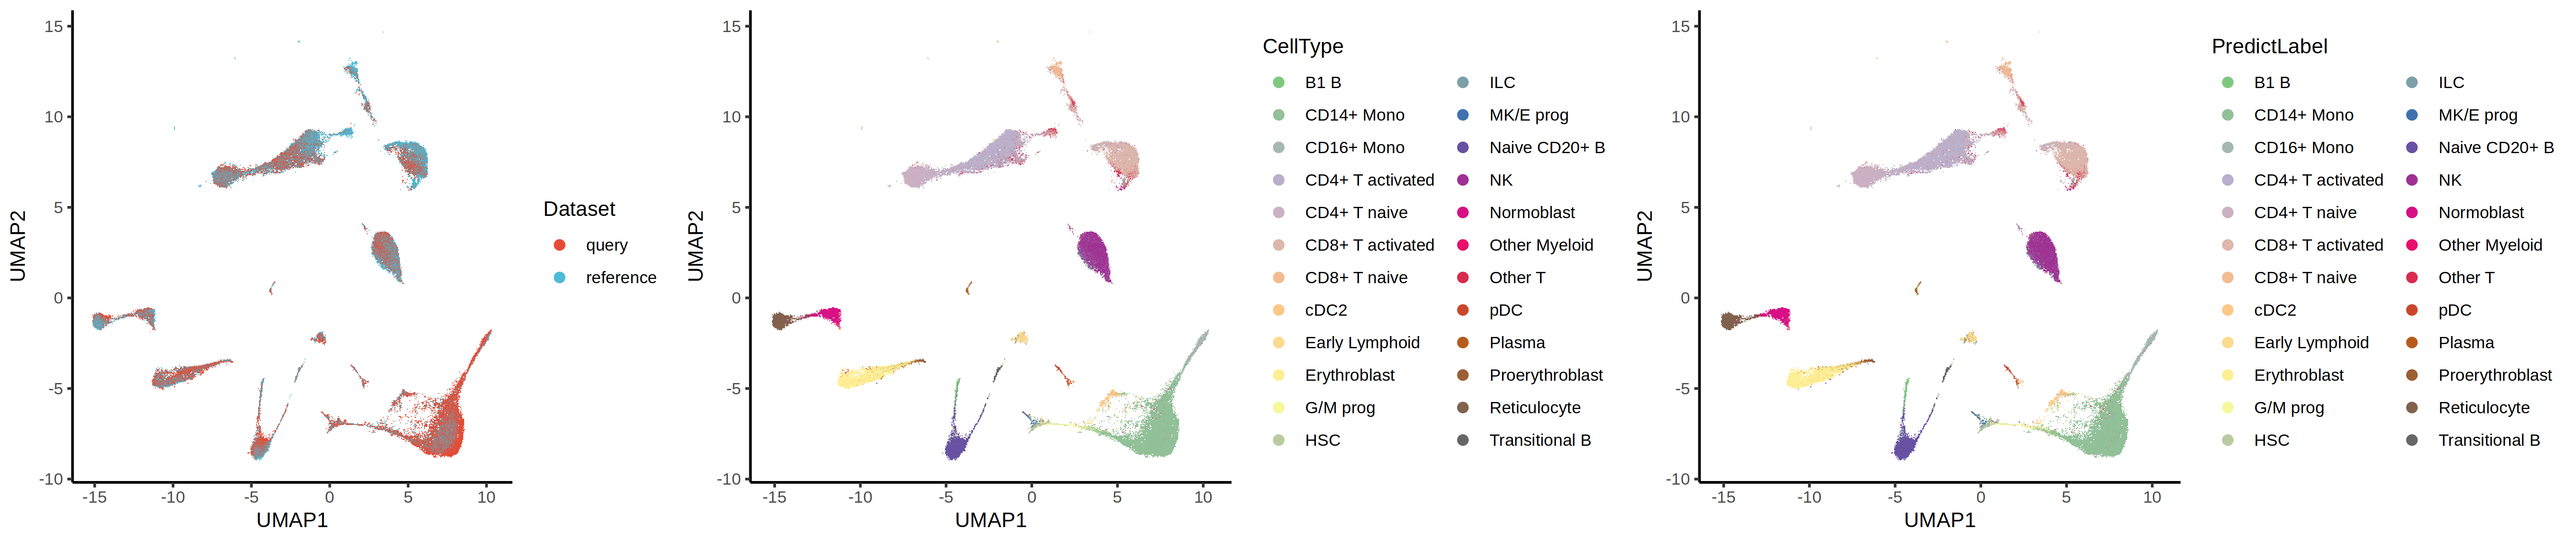

In [13]:
p1 <- ggplot(Palette_umap, aes(UMAP1, UMAP2, color = Dataset)) +
  geom_scattermore(pointsize = 1) +
  scale_color_npg() +
  guides(colour = guide_legend(override.aes = list(size = 2))) +
  theme_classic()+
  theme(legend.position = "right")

Colors <- colorRampPalette(brewer.pal(12, "Accent"))(24)

p2 <- ggplot(Palette_umap, aes(UMAP1, UMAP2, color = CellType)) +
  geom_scattermore(pointsize = 1) +
  scale_color_manual(values = Colors) +  
  guides(colour = guide_legend(override.aes = list(size = 2))) +
  theme_classic()+
  theme(legend.position = "right")


Colors <- colorRampPalette(brewer.pal(12, "Accent"))(24)

p3 <- ggplot(Palette_umap, aes(x = UMAP1, y = UMAP2, color = PredictLabel)) +
  geom_scattermore(pointsize = 1) +   
  scale_color_manual(values = Colors) +  
  guides(colour = guide_legend(override.aes = list(size = 2))) +
  theme_classic() +
  theme(legend.position = "right")

fig.size(4,19)
plot_grid(p1, p2, p3,align = 'h', axis = "b",nrow = 1,rel_widths = c(5,7,7))

## Session Info

In [14]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.10

Matrix products: default
BLAS/LAPACK: /home/server/anaconda3/envs/sqy/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] data.table_1.17.4  ggsci_3.0.3        scattermore_1.2    ggplot2_3.5.1     
[5] RColorBrewer_1.1-3 cowplot_1.1.3      uwot_0.2.2         Matrix_1.6-5      
[9] PaletteSC_0.1.0   

loaded via a namespace (and not attached):
  [1] uuid_1.2-0                  fastmatch_1.1-4            
  [3] plyr_1.8.9         